In [1]:
%load_ext autoreload
%autoreload 2

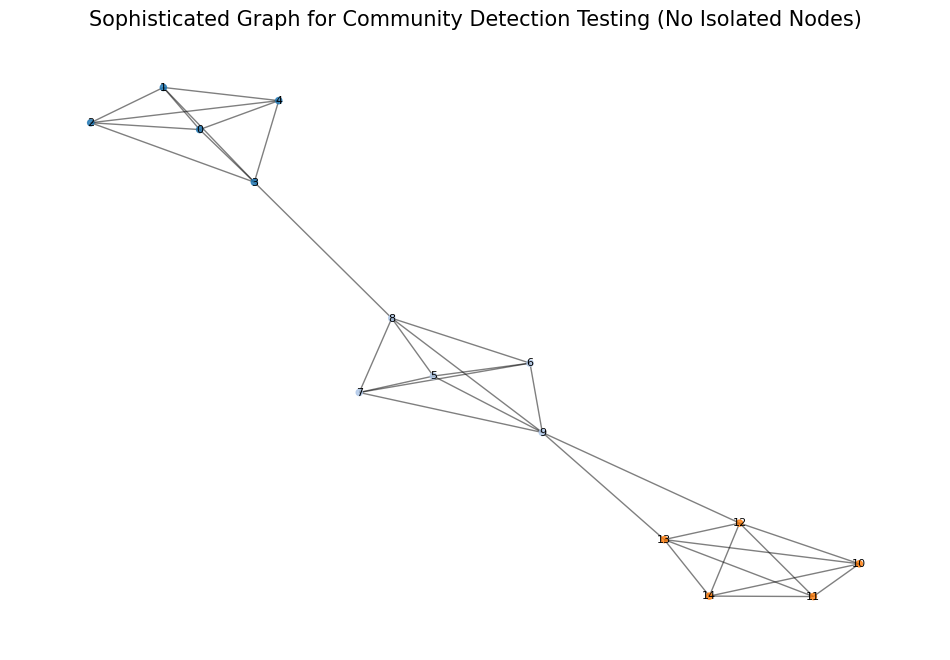

Number of connected components: 1


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
random.seed(42)

# Define the number of communities and their sizes
num_communities = 3
community_sizes = [5, 5, 5]  # Four communities with different sizes

# Define the probability of edges within and between communities
p_intra = 1  # Probability of edges within the same community
p_inter = 0.08  # Probability of edges between different communities

# Create the Stochastic Block Model
probs = [[p_intra if i == j else p_inter for j in range(num_communities)] for i in range(num_communities)]
G = nx.stochastic_block_model(community_sizes, probs, seed=42)

# Ensure no unconnected nodes
isolated_nodes = list(nx.isolates(G))
while isolated_nodes:
    for node in isolated_nodes:
        # Connect to a random non-isolated node
        connected_nodes = [n for n in G.nodes() if n not in isolated_nodes]
        if connected_nodes:
            target = random.choice(connected_nodes)
            G.add_edge(node, target)
    isolated_nodes = list(nx.isolates(G))

# Assign community labels to nodes for visualization
community_labels = []
for i, size in enumerate(community_sizes):
    community_labels += [i] * size

# Generate a color map based on community labels
colors = plt.cm.tab20.colors  # A colormap with enough distinct colors
node_colors = [colors[label % len(colors)] for label in community_labels]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.15)  # Positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add node labels
nx.draw_networkx_labels(G, pos, {node: str(node) for node in G.nodes()}, font_size=8)

plt.title("Sophisticated Graph for Community Detection Testing (No Isolated Nodes)", fontsize=15)
plt.axis('off')
plt.show()

# Print the number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

# My Leiden

In [ ]:
# Function to convert NetworkX graph to custom Graph class
from leiden.leiden_cot import Graph
from leiden.leiden_cot import leiden

def convert_networkx_to_custom_graph(nx_graph):
    """
    Converts a NetworkX graph to a custom Graph class instance.

    Parameters:
    - nx_graph (networkx.Graph): The NetworkX graph to convert.

    Returns:
    - Graph: An instance of the custom Graph class with the same structure.
    """
    custom_graph = Graph()

    # Add all edges to the custom graph
    for u, v, data in nx_graph.edges(data=True):
        # If the NetworkX graph has weights, use them; otherwise, default to 1
        weight = data.get('weight', 1)
        custom_graph.add_edge(u, v, weight)
        custom_graph.update_supernode_features(u, v, 0, 0, 1, 1)

    # Optionally, ensure all nodes are added (even isolated nodes)
    for node in nx_graph.nodes():
        if node not in custom_graph.adj:
            custom_graph.adj[node]  # This will initialize the set for the node

    return custom_graph

# Convert the NetworkX graph to the custom Graph class
g = convert_networkx_to_custom_graph(G)


In [ ]:
communities = leiden(g, gamma=0.5, verbose=True)

In [ ]:
communities

# Their Leiden

In [ ]:
import leidenalg
import igraph

# Convert the NetworkX graph to an igraph object
igraph_graph = igraph.Graph.from_networkx(G)

# Run Leiden algorithm
partition = leidenalg.find_partition(igraph_graph, leidenalg.CPMVertexPartition, resolution_parameter=0.5)

# Convert partition to the format expected by plot_network_with_communities
leiden_communities = [community for community in partition]
print(leiden_communities)